In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Visualize Residual Forecast Errors**

Forecast errors on time series regression problems are called residuals or residual errors. Careful exploration of residual errors on your time series prediction problem can tell you a lot about your forecast model and even suggest improvements.

**Residual Forecast Errors**

Forecast errors on a time series forecasting problem are called residual errors or residuals. A residual error is calculated as the expected outcome minus the forecast, for example:

$\ residual\_error = expected - forecast$

Or, more succinctly and using standard terms as:

$\ e = y - yhat$

We often stop there and summarize the skill of a model as a summary of this error. Instead, we can collect these individual residual errors across all forecasts and use them to better understand the forecast model. Generally, when exploring residual errors we are looking for patterns or structure. A sign of a pattern suggests that the errors are not random. 

**We expect the residual errors to be random, because it means that the model has captured all of the structure and the only error left is the random fluctuations in the time series that cannot be modeled. A sign of a pattern or structure suggests that there is more information that a model could capture and use to make better predictions.** *White noise: part3/white noise*

In [3]:
series = pd.read_csv("daily-total-female-births.csv", header=0,index_col=0, squeeze=True, parse_dates=True)
series.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

**Persistence Forecast Model**

In [4]:
# Create lagged dataset

values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1),values], axis=1)
dataframe.columns = ["t", "t+1"]

In [5]:
# Split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train,test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [6]:
# persistance model 
predictions = [x for x in test_X]

In [9]:
# Calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
pd.DataFrame(residuals).head()

,0
0,9.0
1,-10.0
2,3.0
3,-6.0
4,30.0


**Residual Line Plot**

We would expect the plot to be random around the value of 0 and not show any trend or cyclic structure.

Text(0.5, 1.0, 'Residual Line Plot')

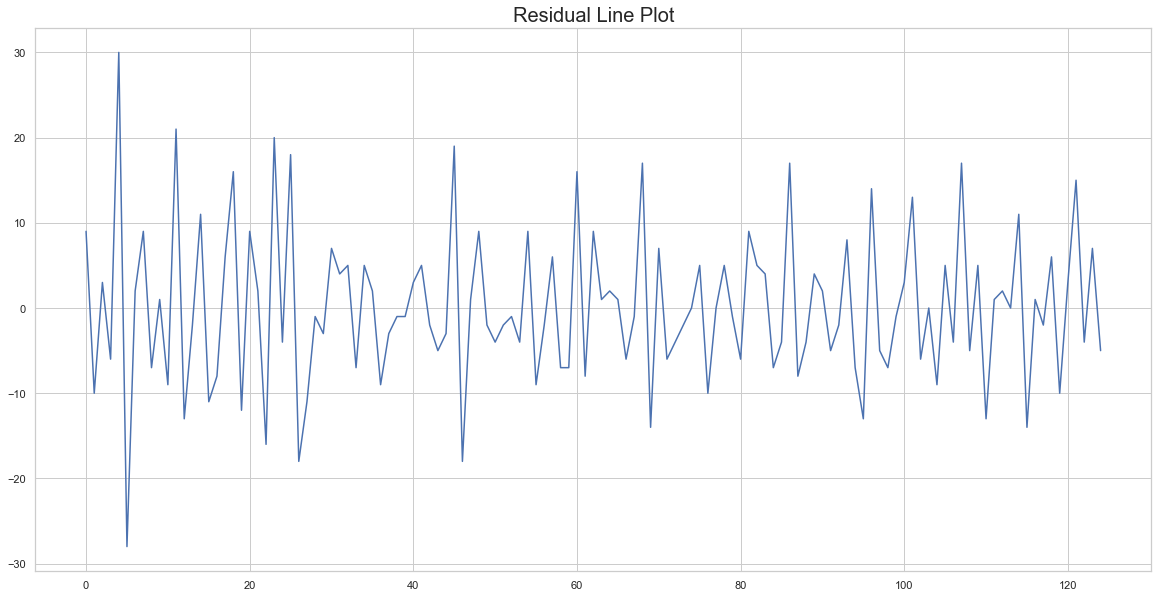

In [14]:
# Residual Line Plot
fig, ax = plt.subplots(figsize=(20,10))
sns.set_theme(style='whitegrid')
sns.lineplot(data=residuals)
ax.set_title("Residual Line Plot",fontdict={'fontsize':20})

**Residual Summary Statistics**

We can calculate summary statistics on the residual errors. Primarily, we are interested in the mean value of the residual errors. A value close to zero suggests no bias in the forecasts, whereas positive and negative values suggest a positive or negative bias in the forecasts made. It is useful to know about a bias in the forecasts as it can be directly corrected in forecasts prior to their use or evaluation.

In [16]:
# Summary statistics
residuals = pd.DataFrame(residuals)
residuals.describe()

,0
count,125.000000
mean,0.064000
std,9.187776
min,-28.000000
25%,-6.000000
50%,-1.000000
75%,5.000000
max,30.000000


*Running the example shows a mean error value close to zero, but perhaps not close enough. It suggests that there may be some bias and that we may be able to further improve the model by performing a bias correction. This could be done by adding the mean residual error (0.064000) to forecasts. This may work in this case, but it is a naive form of bias correction and there are more sophisticated methods available.*

**Residual Histogram and Density Plots**

Text(0.5, 1.0, 'Histogram & Density Plots')

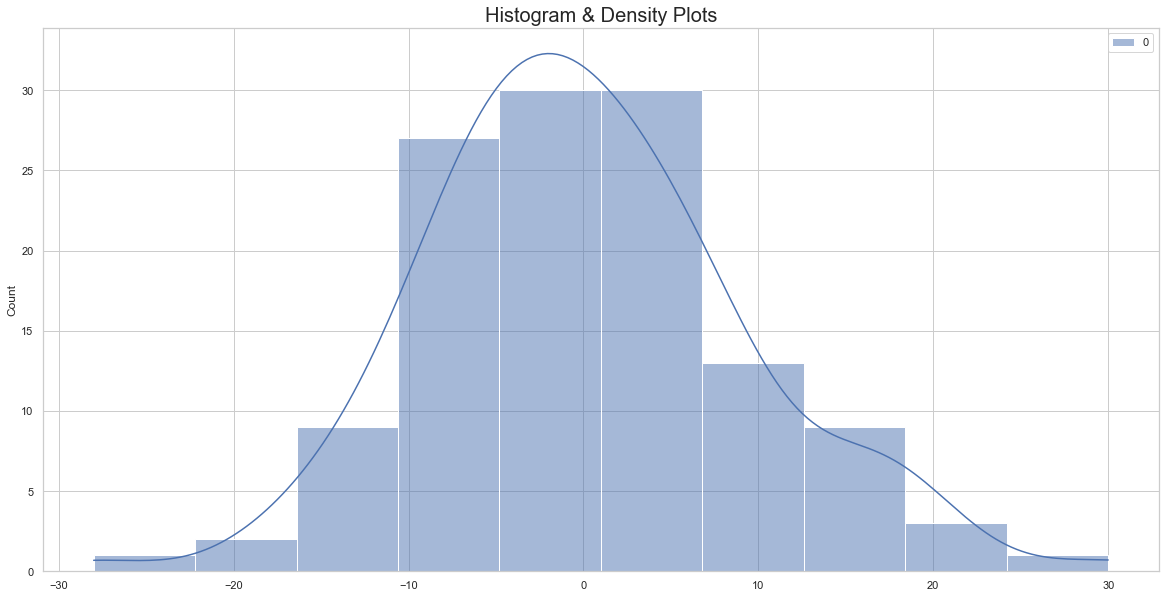

In [25]:
# Residual Histogram and Density Plots
fig, ax = plt.subplots(figsize=(20,10))
sns.set_theme(style='whitegrid')
sns.histplot(data=residuals,kde=True,bins=10)
ax.set_title(f"Histogram & Density Plots",fontdict={'fontsize':20})

We can see that the distribution does have a Gaussian look, but is perhaps more pointy, showing an exponential distribution with some asymmetry. If the plot showed a distribution that was distinctly non-Gaussian, it would suggest that assumptions made by the modeling process were perhaps incorrect and that a different modeling method may be required. A large skew may suggest the opportunity for performing a transform to the data prior to modeling, such as taking the log or square root.

**Residual Q-Q Plot**

The Q-Q plot can be used to quickly check the normality of the distribution of residual errors. The values are ordered and compared to an idealized Gaussian distribution. The comparison is shown as a scatter plot (theoretical on the x-axis and observed on the y-axis) where a match between the two distributions is shown as a diagonal line from the bottom left to the top-right of the plot.

In [46]:
# persistence model
predictions_new = [(x-0.064000) for x in test_X]
# calculate residuals
residuals_new = [test_y[i]-predictions_new[i] for i in range(len(predictions_new))]
residuals_new = np.array(residuals_new)

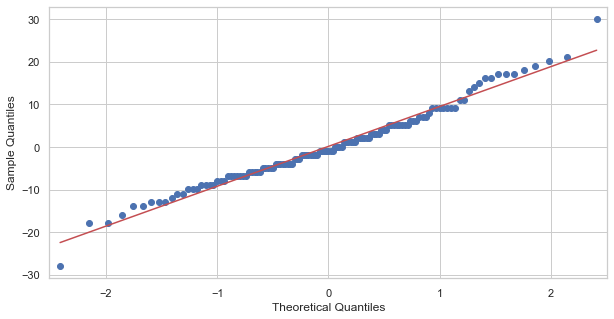

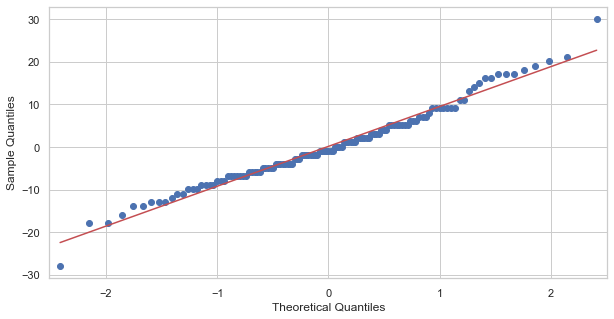

In [51]:
# from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm # using this takes more time than the former

fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='whitegrid')
sm.qqplot(residuals_new,line='r', ax=ax)

**Residual Autocorrelation Plot**

Autocorrelation calculates the strength of the relationship between an observation and observa- tions at prior time steps. We can calculate the autocorrelation of the residual error time series and plot the results. This is called an autocorrelation plot. **We would not expect there to be any correlation between the residuals. This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot).**

*A significant autocorrelation in the residual plot suggests that the model could be doing a better job of incorporating the relationship between observations and lagged observations, called autoregression.*

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

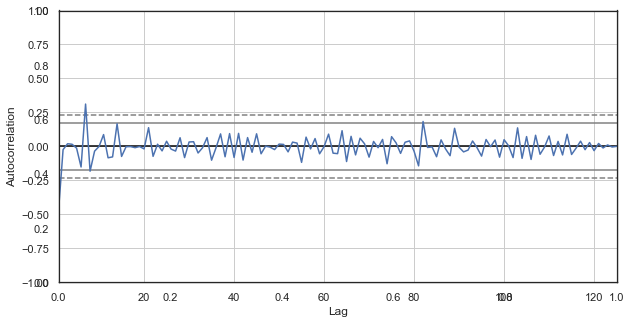

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='white')
pd.plotting.autocorrelation_plot(residuals)
# plt.grid()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

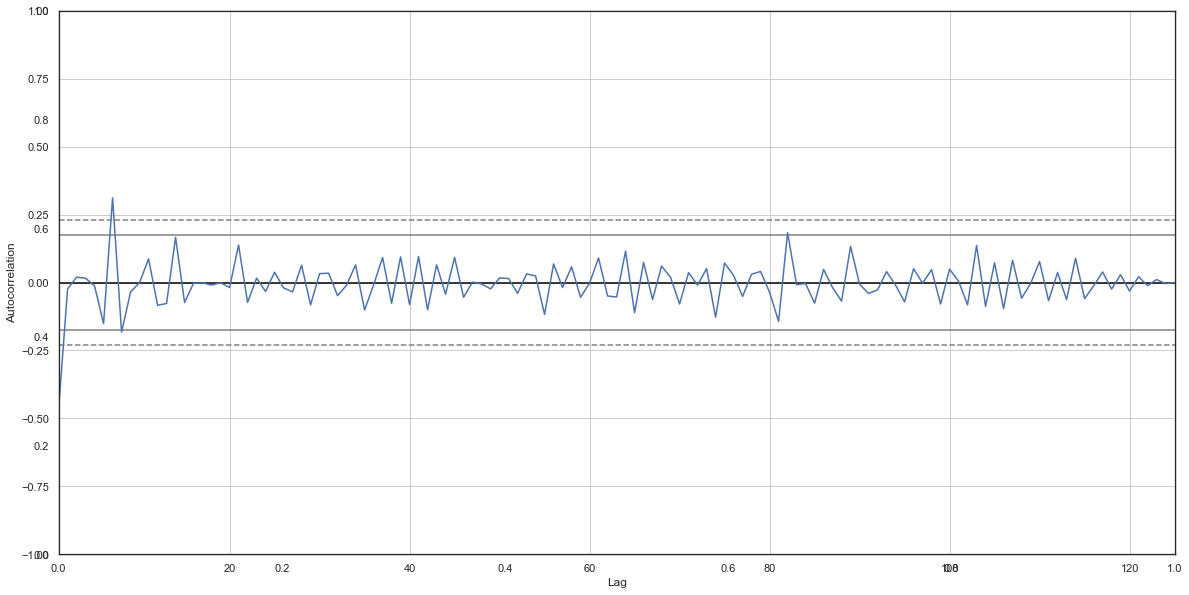

In [63]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_theme(style='white')
pd.plotting.autocorrelation_plot(residuals_new)
# plt.grid()

Running the example creates an autoregression plot of other residual errors. We do not see an obvious autocorrelation trend across the plot. There may be some positive autocorrelation worthy of further investigation at lag 7 that seems significant.